In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading dataset

In [2]:
df=pd.read_csv('uber.csv')

In [3]:
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# 1.Preprocess the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.size

1800000

In [8]:
df.shape

(200000, 9)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200000.0,2.771250e+07,1.601382e+07,1.000000,1.382535e+07,2.774550e+07,4.155530e+07,5.542357e+07
fare_amount,200000.0,1.135996e+01,9.901776e+00,-52.000000,6.000000e+00,8.500000e+00,1.250000e+01,4.990000e+02
pickup_longitude,200000.0,-7.252764e+01,1.143779e+01,-1340.648410,-7.399206e+01,-7.398182e+01,-7.396715e+01,5.741846e+01
pickup_latitude,200000.0,3.993589e+01,7.720539e+00,-74.015515,4.073480e+01,4.075259e+01,4.076716e+01,1.644421e+03
dropoff_longitude,199999.0,-7.252529e+01,1.311741e+01,-3356.666300,-7.399141e+01,-7.398009e+01,-7.396366e+01,1.153573e+03
dropoff_latitude,199999.0,3.992389e+01,6.794829e+00,-881.985513,4.073382e+01,4.075304e+01,4.076800e+01,8.726976e+02
passenger_count,200000.0,1.684535e+00,1.385997e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,2.080000e+02


In [10]:
df=df.drop(['Unnamed: 0','key'],axis=1)

In [11]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [12]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

## Find the missing values

In [13]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

## filling null values

In [14]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)

In [15]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format

In [16]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],errors='coerce')

In [17]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [18]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


## To segregate each time of date and time

In [19]:
df=df.assign(hour=df.pickup_datetime.dt.hour,
            day=df.pickup_datetime.dt.day,
            month=df.pickup_datetime.dt.month,
            year=df.pickup_datetime.dt.year,
            dayofweek=df.pickup_datetime.dt.day_of_week)

In [20]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek'],
      dtype='object')

In [21]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [22]:
df=df.drop(['pickup_datetime'],axis=1)

In [23]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [24]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

## 2. Checking the outliers 

<AxesSubplot:ylabel='fare_amount'>

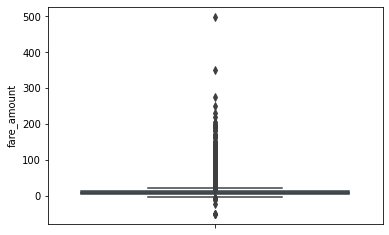

In [25]:
sns.boxplot(y=df['fare_amount'])

fare_amount             AxesSubplot(0.125,0.799681;0.352273x0.0803191)
pickup_longitude     AxesSubplot(0.547727,0.799681;0.352273x0.0803191)
pickup_latitude         AxesSubplot(0.125,0.703298;0.352273x0.0803191)
dropoff_longitude    AxesSubplot(0.547727,0.703298;0.352273x0.0803191)
dropoff_latitude        AxesSubplot(0.125,0.606915;0.352273x0.0803191)
passenger_count      AxesSubplot(0.547727,0.606915;0.352273x0.0803191)
hour                    AxesSubplot(0.125,0.510532;0.352273x0.0803191)
day                  AxesSubplot(0.547727,0.510532;0.352273x0.0803191)
month                   AxesSubplot(0.125,0.414149;0.352273x0.0803191)
year                 AxesSubplot(0.547727,0.414149;0.352273x0.0803191)
dayofweek               AxesSubplot(0.125,0.317766;0.352273x0.0803191)
dtype: object

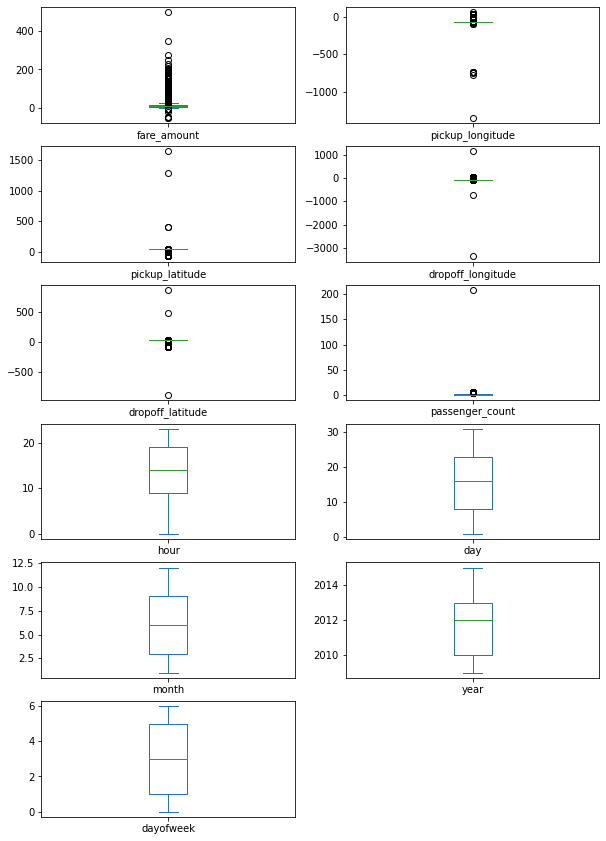

In [26]:
df.plot(kind="box",subplots=True,layout=(8,2),figsize=(10,20))

## remove outliers

In [27]:
def remove_outlier(df1,col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR
    df[col]=np.clip(df1[col],lower,upper)
    return df1

In [28]:
def treat_outliers(df1,col_list):
    for i in col_list:
        df1=remove_outlier(df1,i)
    return df1

In [29]:
df=treat_outliers(df,df.iloc[:,0::])

fare_amount             AxesSubplot(0.125,0.799681;0.352273x0.0803191)
pickup_longitude     AxesSubplot(0.547727,0.799681;0.352273x0.0803191)
pickup_latitude         AxesSubplot(0.125,0.703298;0.352273x0.0803191)
dropoff_longitude    AxesSubplot(0.547727,0.703298;0.352273x0.0803191)
dropoff_latitude        AxesSubplot(0.125,0.606915;0.352273x0.0803191)
passenger_count      AxesSubplot(0.547727,0.606915;0.352273x0.0803191)
hour                    AxesSubplot(0.125,0.510532;0.352273x0.0803191)
day                  AxesSubplot(0.547727,0.510532;0.352273x0.0803191)
month                   AxesSubplot(0.125,0.414149;0.352273x0.0803191)
year                 AxesSubplot(0.547727,0.414149;0.352273x0.0803191)
dayofweek               AxesSubplot(0.125,0.317766;0.352273x0.0803191)
dtype: object

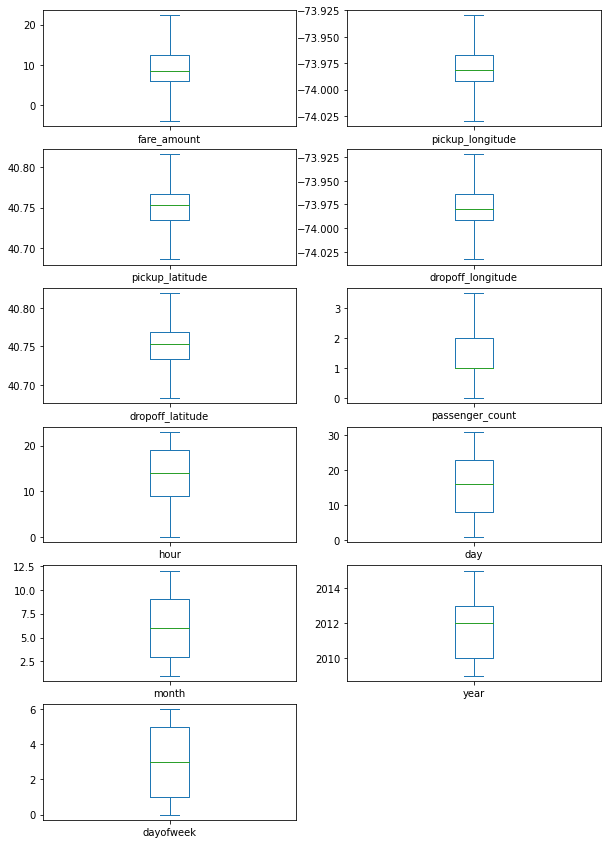

In [30]:
df.plot(kind="box",subplots=True,layout=(8,2),figsize=(10,20))

## Calculate the distance using Haversine to calculate the distance between to points. Can't use Eucladian as it is for flat surface.

In [31]:
#pip install haversine


In [32]:

import haversine as hs 
travel_dist=[]
for pos in range(len(df['pickup_longitude'])):
    long1,lati1,long2,lati2=[df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
    loc1=(lati1,long1)
    loc2=(lati2,long2)
    c=hs.haversine(loc1,loc2)
    travel_dist.append(c)

In [33]:
print(travel_dist)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
df['dist_travel_km']=travel_dist

In [36]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683325
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457593
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036384
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661686
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116088


In [50]:
#Uber doesn't travel over 130 kms so minimize the distance 
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]

In [51]:
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 12)


In [52]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
                                    ]

In [54]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [55]:
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 12)


In [56]:
corr=df.corr()

In [57]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218704,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.786388
pickup_longitude,0.154069,1.000000,0.259497,0.425631,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.048450
pickup_latitude,-0.110842,0.259497,1.000000,0.048898,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.073364
dropoff_longitude,0.218704,0.425631,0.048898,1.000000,0.245627,-0.009325,-0.046578,-0.004027,0.002394,0.011355,-0.003349,0.155245
dropoff_latitude,-0.125898,0.073290,0.515714,0.245627,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.052703
passenger_count,0.015778,-0.013213,-0.012889,-0.009325,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009884
hour,-0.023623,0.011579,0.029681,-0.046578,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.035708
day,0.004534,-0.003204,-0.001553,-0.004027,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.001709
month,0.030817,0.001169,0.001562,0.002394,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.010050
year,0.141277,0.010198,-0.014243,0.011355,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.022294


<AxesSubplot:>

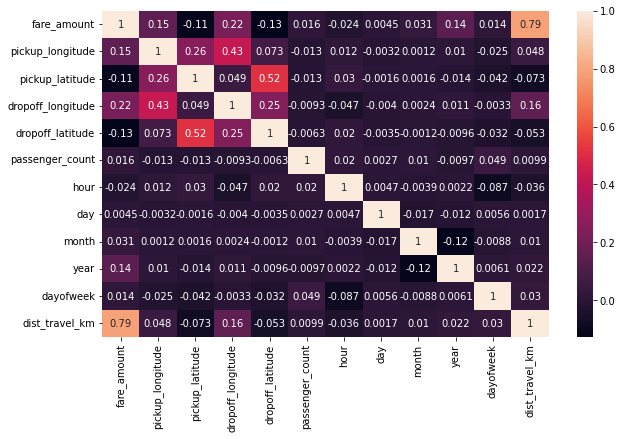

In [58]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

## Dividing the dataset into feature and target values¶

In [62]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

In [60]:
y = df['fare_amount']

## Dividing the dataset into training and testing dataset

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [65]:
regression.fit(X_train,y_train)

LinearRegression()

In [66]:
regression.intercept_ #To find the linear intercept

3600.3668428445585

In [67]:
regression.coef_ #To find the linear coeeficient

array([ 2.54621480e+01, -7.13879373e+00,  1.94878071e+01, -1.76653400e+01,
        6.04128100e-02,  5.86405295e-03,  3.08303107e-03,  5.90495145e-02,
        3.67902942e-01, -3.19016357e-02,  1.83934429e+00])

In [68]:
prediction = regression.predict(X_test) #To predict the target values

In [69]:
print(prediction)

[ 7.90693506  8.74413685  8.16484062 ...  7.39714007  6.30439028
 11.62174041]


## Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [72]:
from sklearn.metrics import r2_score 

In [73]:
r2_score(y_test,prediction)

0.6676954640688736

In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
MSE = mean_squared_error(y_test,prediction)

In [76]:
MSE 

9.783859946219284

In [77]:
RMSE = np.sqrt(MSE)

In [78]:
RMSE

3.127916230690855

## Random Forest Regression

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction

In [81]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [82]:
y_pred = rf.predict(X_test)

### Metrics evaluatin for Random Forest

In [84]:
R2_Random = r2_score(y_test,y_pred)

In [85]:
R2_Random

0.7969400511427022

In [86]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [87]:
MSE_Random

5.978582551512383

In [88]:
RMSE_Random = np.sqrt(MSE_Random)

In [89]:
RMSE_Random

2.445114016055771